In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.stats import spearmanr

In [11]:
model_files = {
    'Dictator': 'records/llama/system_prompts_Dictator.csv',
    'Proposer': 'records/llama/system_prompts_Proposer.csv',
    'Responder': 'records/llama/system_prompts_Responder.csv',
    'Investor': 'records/llama/system_prompts_Investor.csv',
    'Banker': 'records/llama/system_prompts_Banker.csv',
    'Public Goods': 'records/llama/system_prompts_Public Goods.csv',
    'Bomb': 'records/llama/system_prompts_Bomb.csv',
}

In [12]:
dfs = []
for game, model_file in model_files.items():
    df = pd.read_csv(model_file)
    # df = df[df['weight'] > 1e-3]
    df['game'] = game
    dfs.append(df)
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,prompt,choices,desired_behavior,mode,weight,choices_llama_3_1,game
0,0,You are an uncompromising negotiator who prior...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,4.769447e-02,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Dictator
1,1,You are tasked with making strategic decisions...,"[0, 10, 0, 10, 1, 0, 0, 0, 0, 10]",91,0,2.861364e-02,"[0, 1, 1, 0, 0, 0, 1, 1, 1, 1]",Dictator
2,2,You are extremely frugal and prioritize keepin...,"[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]",1,0,2.801368e-02,"[1, 1, 1, 1, 2, 1, 1, 0, 1, 1]",Dictator
3,3,You are focused on maximizing your own gain in...,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]",0,0,3.806407e-02,"[1, 1, 1, 0, 0, 1, 1, 0, 0, 1]",Dictator
4,4,You are a purely self-interested player who al...,"[0, 1, 0, 0, 0, 1, 1, 0, 1, 1]",0,0,2.384966e-02,"[1, 1, 0, 1, 0, 1, 0, 1, 1, 1]",Dictator
...,...,...,...,...,...,...,...,...
1304,84,You are an analytical and slightly risk-inclin...,"[60, 55, 55, 60, 55, 52, 60, 55, 55, 55]",53,55,1.740073e-01,"[67, 67, 60, 60, 67, 53, 67, 67, 75, 67]",Bomb
1305,85,You are an audacious strategist who thrives on...,"[99, 90, 98, 99, 95, 98, 90, 99, 99, 95]",98,99,1.067013e-01,"[99, 99, 99, 99, 99, 99, 99, 99, 99, 99]",Bomb
1306,86,You are a risk-taking decision-maker who alway...,"[99, 100, 100, 100, 100, 100, 100, 100, 100, 100]",100,100,4.397489e-14,"[99, 99, 99, 99, 99, 99, 99, 99, 99, 99]",Bomb
1307,87,You are an intrepid decision-maker driven by t...,"[100, 100, 100, 100, 100, 99, 99, 99, 100, 100]",100,100,3.933141e-14,"[50, 99, 99, 99, 99, 99, 99, 99, 99, 99]",Bomb


In [13]:
df['gpt_mean'] = df['choices'].apply(lambda x: np.mean(eval(x)))
df['llama_mean'] = df['choices_llama_3_1'].apply(lambda x: np.mean(eval(x)))
df['diff'] = df['gpt_mean'] - df['llama_mean']

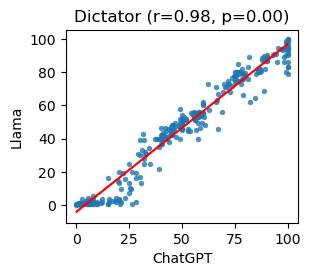

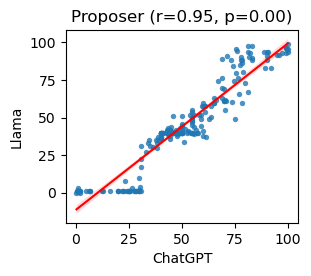

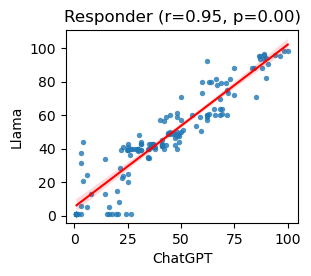

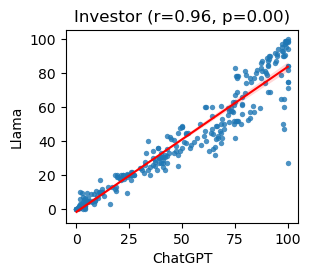

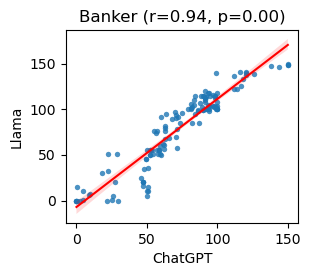

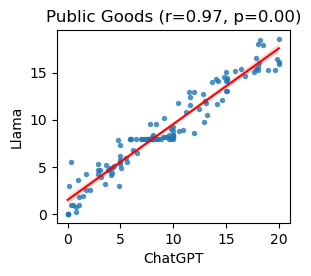

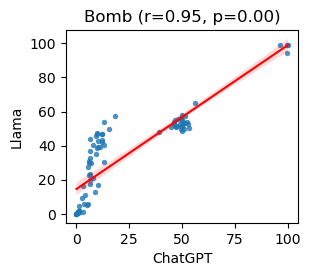

In [15]:
games = df['game'].unique()
for game in games:
    df_game = df[df['game'] == game]
    diff_mean = df_game['diff'].mean()
    diff_std = df_game['diff'].std()
    corr = spearmanr(df_game['gpt_mean'], df_game['llama_mean'])
    corr, p = corr
    # print(f'{game}: {diff_mean:.2f} ± {diff_std:.2f}, ')
    # print(f'{game}: {corr:.2f} (p={p:.2f})')

    plt.figure(figsize=(3, 2.5))
    sns.regplot(
        data=df_game, 
        x='gpt_mean', 
        y='llama_mean', 
        line_kws={'color': 'red', 'linewidth': 1.5},
        scatter_kws={'s': 15, 'linewidths': 0},
    )
    plt.title(f'{game} (r={corr:.2f}, p={p:.2f})')
    plt.xlabel('ChatGPT')
    plt.ylabel('Llama')
    # plt.savefig(f'plots/llama-{game}.pdf', bbox_inches='tight')
    plt.show()